## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

## Load dataset

In [2]:
df = pd.read_csv('../raw_data/fraudTrain_cleaned2.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295379 entries, 0 to 1295378
Data columns (total 42 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   trans_date_trans_time    1295379 non-null  object 
 1   cc_num                   1295379 non-null  int64  
 2   merchant                 1295379 non-null  object 
 3   category                 1295379 non-null  object 
 4   amt                      1295379 non-null  float64
 5   first                    1295379 non-null  object 
 6   last                     1295379 non-null  object 
 7   state                    1295379 non-null  object 
 8   lat                      1295379 non-null  float64
 9   long                     1295379 non-null  float64
 10  city_pop                 1295379 non-null  int64  
 11  job                      1295379 non-null  object 
 12  dob                      1295379 non-null  object 
 13  merch_lat                1295379 non-null 

## One hot encoding categorical variables

In [4]:
# get dummies for 'state'
state_dummies = pd.get_dummies(df['state'],prefix='state')

# Concatenate one-hot encoded dataframe to main dataframe.
df = pd.concat([df, state_dummies], axis=1)

In [5]:
# get dummies for 'day_of_week'
day_dummies = pd.get_dummies(df['day_of_week'],prefix='day')

# Concatenate one-hot encoded dataframe to main dataframe.
df = pd.concat([df, day_dummies], axis=1)

In [6]:
# get dummies for 'month'
month_dummies = pd.get_dummies(df['month'],prefix='month')

# Concatenate one-hot encoded dataframe to main dataframe.
df = pd.concat([df, month_dummies], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295379 entries, 0 to 1295378
Columns: 112 entries, trans_date_trans_time to month_12
dtypes: float64(8), int64(25), object(9), uint8(70)
memory usage: 511.4+ MB


## Drop unnecessary columns

In [8]:
drop_columns = ['val_mean_amt', 'state', 'job', 'dob', 'day_of_week', 'month', 'hour', 'distance', 'distance2', 'lat', 'long', 'merch_lat', 'merch_long']
df.drop(drop_columns, axis = 1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295379 entries, 0 to 1295378
Data columns (total 99 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   trans_date_trans_time    1295379 non-null  object 
 1   cc_num                   1295379 non-null  int64  
 2   merchant                 1295379 non-null  object 
 3   category                 1295379 non-null  object 
 4   amt                      1295379 non-null  float64
 5   first                    1295379 non-null  object 
 6   last                     1295379 non-null  object 
 7   city_pop                 1295379 non-null  int64  
 8   is_fraud                 1295379 non-null  int64  
 9   val_mean_amt_dist        1295379 non-null  float64
 10  category_entertainment   1295379 non-null  int64  
 11  category_food_dining     1295379 non-null  int64  
 12  category_gas_transport   1295379 non-null  int64  
 13  category_grocery_net     1295379 non-null 

## Split data into training and testing sets.

In [10]:
#Check partition sizes with 70/30 train/test split
len(df) * .7, len(df) * .3

(906765.2999999999, 388613.7)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='is_fraud'), 
                                                    df.is_fraud, test_size=0.3, 
                                                    random_state=47)

In [12]:
X_train.shape, X_test.shape

((906765, 98), (388614, 98))

In [13]:
y_train.shape, y_test.shape

((906765,), (388614,))

In [14]:
#Save the 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last' columns 
#from the train/test data into labels_train and labels_test
#Then drop those columns from `X_train` and `X_test`.

labels_list = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last']
labels_train = X_train[['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last']]
labels_test = X_test[['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last']]
X_train.drop(columns=labels_list, inplace=True)
X_test.drop(columns=labels_list, inplace=True)
X_train.shape, X_test.shape

((906765, 92), (388614, 92))

In [15]:
#Check the `info` method of `X_train` to verify all features are numeric
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906765 entries, 825668 to 889991
Data columns (total 92 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      906765 non-null  float64
 1   city_pop                 906765 non-null  int64  
 2   val_mean_amt_dist        906765 non-null  float64
 3   category_entertainment   906765 non-null  int64  
 4   category_food_dining     906765 non-null  int64  
 5   category_gas_transport   906765 non-null  int64  
 6   category_grocery_net     906765 non-null  int64  
 7   category_grocery_pos     906765 non-null  int64  
 8   category_health_fitness  906765 non-null  int64  
 9   category_home            906765 non-null  int64  
 10  category_kids_pets       906765 non-null  int64  
 11  category_misc_net        906765 non-null  int64  
 12  category_misc_pos        906765 non-null  int64  
 13  category_personal_care   906765 non-null  int64  
 14 

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388614 entries, 1133158 to 157046
Data columns (total 92 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      388614 non-null  float64
 1   city_pop                 388614 non-null  int64  
 2   val_mean_amt_dist        388614 non-null  float64
 3   category_entertainment   388614 non-null  int64  
 4   category_food_dining     388614 non-null  int64  
 5   category_gas_transport   388614 non-null  int64  
 6   category_grocery_net     388614 non-null  int64  
 7   category_grocery_pos     388614 non-null  int64  
 8   category_health_fitness  388614 non-null  int64  
 9   category_home            388614 non-null  int64  
 10  category_kids_pets       388614 non-null  int64  
 11  category_misc_net        388614 non-null  int64  
 12  category_misc_pos        388614 non-null  int64  
 13  category_personal_care   388614 non-null  int64  
 14

## Initial baseline modeling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
# Fit the model on the trainng data.
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

# Print the accuracy from the testing data.
print(accuracy_score(y_pred_test, y_test))

0.9942668045927321


This doesn't tell us very much because of the imbalanced nature of the data. It's possible that the model has accurately predicted EVERY transaction as non-fraud and still have a high accuracy score.

In [18]:
from sklearn.metrics import classification_report

print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train))

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    901486
           1       0.48      0.19      0.27      5279

    accuracy                           0.99    906765
   macro avg       0.74      0.59      0.63    906765
weighted avg       0.99      0.99      0.99    906765

[Test Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386387
           1       0.50      0.22      0.31      2227

    accuracy                           0.99    388614
   macro avg       0.75      0.61      0.65    388614
weighted avg       0.99      0.99      0.99    388614



Based on the precision values, this tells us that ~50% of our current "out of the box" model's fraud predictions are correct classifications. Based on our recall values, our model was only able to correctly classify ~20% of our positive cases.

Because the objective of this problem is to catch fraudulent transactions, we want to aim for high recall.

## Scaling features

Is it better to scale only nonbinary features, or to scale ALL features?  We'll create two different versions of this.

In [19]:
#Scale all features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## GridSearchCV to tune parameters

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

In [ ]:
logreg2 = LogisticRegression()
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(penalty=penalty,C=c_values)


logreg2_cv = GridSearchCV(estimator = logreg2, param_grid = grid, cv=5, scoring = 'recall')

logreg2_cv.fit(X_train, y_train)

print(clf2.best_params_, clf2.best_score_)

In [ ]:
y_pred_train2 = clf2.predict(X_train)
y_pred_test2 = clf2.predict(X_test)

In [ ]:
print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train2))

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test2))

## PCA

Goal is to reduce the dimension

In [20]:
from sklearn.decomposition import PCA

In [21]:
model = PCA()
model.fit(X_train_scaled)

PCA()

In [22]:
transformed = model.transform(X_train_scaled)

In [23]:
print(transformed)

[[-7.18825858e-01  8.64497555e-01 -2.82995169e-01 ...  7.18175519e-16
  -1.88737914e-15 -8.42208248e-16]
 [-1.04141446e+00 -3.32229746e-01 -1.23080785e+00 ...  3.64552138e-15
   1.13797860e-15 -3.09550562e-15]
 [ 1.67664174e+00 -1.40603996e+00 -2.75494275e-01 ... -3.46077333e-16
  -2.41473508e-15 -1.32001615e-15]
 ...
 [-9.30486269e-01 -4.32044670e-01  4.45346436e-01 ...  1.95763544e-15
  -3.30291350e-15 -1.55073437e-15]
 [ 2.93521696e+00  2.95170683e-01  8.64417745e-02 ... -1.14491749e-16
  -2.77555756e-15 -4.53630189e-16]
 [ 1.81230648e+00 -1.84812094e+00 -1.17811428e+00 ...  1.63064007e-16
   3.33066907e-16  1.04517089e-15]]


In [24]:
print(model.components_)

[[ 2.50402691e-01 -2.61840570e-02  2.52858153e-01 ... -5.02247734e-04
  -4.19984803e-04 -2.64515164e-03]
 [ 6.39656476e-01  3.34140620e-02  6.36609686e-01 ...  2.21721076e-03
  -1.32708475e-03  8.26427148e-05]
 [-1.83143812e-02  5.79010275e-01 -3.47157762e-02 ... -1.55463052e-03
   7.65842667e-03  2.69859624e-02]
 ...
 [ 3.26162899e-16  2.37335904e-16 -2.04992013e-16 ... -2.18543645e-03
  -2.20434381e-03 -3.02638310e-03]
 [ 1.34191897e-16  4.57369246e-18 -1.33851243e-16 ...  2.33035023e-01
   2.35051132e-01  3.22705909e-01]
 [ 5.45509230e-16  3.15331659e-16 -4.15303818e-16 ... -1.86184630e-03
  -1.87795411e-03 -2.57827684e-03]]


In [25]:
features = range(model.n_components_)

Text(0.5, 1.0, 'Variance of PCA Features')

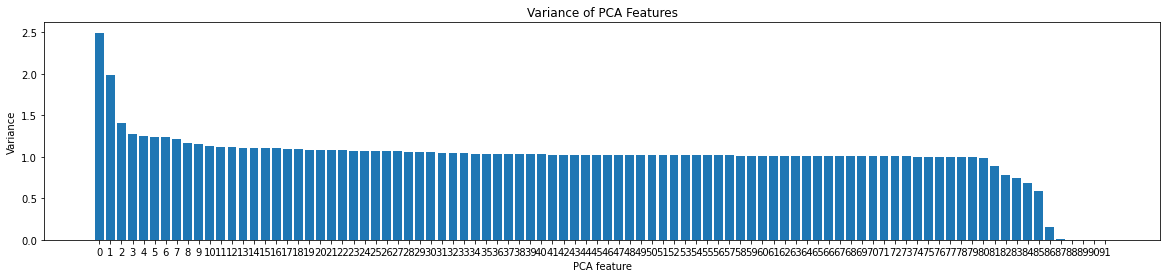

In [28]:
plt.figure(figsize=(20,4))
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.title('Variance of PCA Features')

Not sure if PCA is helpful to reduce the dimension, primarily because the majority of our features are dummy variables which naturally has variance of approximately 1.

In [29]:
pca = PCA(n_components = 2)
pca.fit(X_train_scaled)

PCA(n_components=2)

In [30]:
transformed = pca.transform(X_train_scaled)

In [31]:
print(transformed.shape)

(906765, 2)


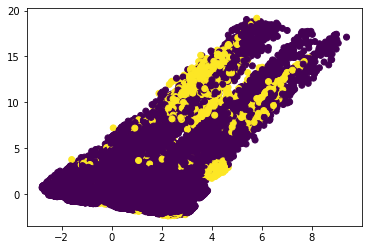

In [33]:
xs = transformed[:,0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c = y_train)
plt.show()

In [36]:
logreg3 = LogisticRegression()
logreg3.fit(transformed, y_train)

y_pred_train2 = logreg3.predict(transformed)


print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train))

[Training Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    901486
           1       0.48      0.19      0.27      5279

    accuracy                           0.99    906765
   macro avg       0.74      0.59      0.63    906765
weighted avg       0.99      0.99      0.99    906765



## Try Min-Max Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
minmaxscaler = MinMaxScaler()

minmaxscaler.fit(X_train)

X_train_minmax = minmaxscaler.transform(X_train)
X_test_minmax = minmaxscaler.transform(X_test)

In [48]:
logreg4 = LogisticRegression(solver='liblinear')
# Fit the model on the trainng data.
logreg4.fit(X_train_minmax, y_train)

y_pred_train = logreg4.predict(X_train_minmax)
y_pred_test = logreg4.predict(X_test_minmax)

In [49]:
print("[Training Classification Report]")
print(classification_report(y_train, y_pred_train))

print("[Test Classification Report]")
print(classification_report(y_test, y_pred_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    901486
           1       0.73      0.34      0.46      5279

    accuracy                           1.00    906765
   macro avg       0.86      0.67      0.73    906765
weighted avg       0.99      1.00      0.99    906765

[Test Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386387
           1       0.72      0.36      0.48      2227

    accuracy                           1.00    388614
   macro avg       0.86      0.68      0.74    388614
weighted avg       0.99      1.00      0.99    388614



Running logistic regression on min-max scaled variables produce slightly better results.  

In [50]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Logistic: f1=0.479 auc=0.476


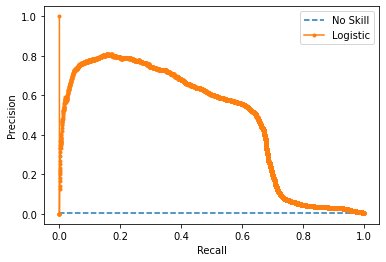

In [52]:
lr_probs = logreg4.predict_proba(X_test_minmax)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred_test), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()